# What do we know about COVID-19 risk factors?
*About this Notebook*

    In this notebook,we have answered the questions given in the task by using lexical model(TF-IDF). Moreover, literature clustering is also being performed to better understand the domains of articles/documents and efficiently target/search the specific domain of articles. We worked on paragraph rather than documents to get the better results in question answering and literature clustering, and it worked.However, the end result is document (not paragraph: paragraphs are used only for training). Original dataset contains around 50k papers and many of them are not specifically about COVID-19. The dataset we have used is acquired by filtering the original 'CORD-19-research-challenge' dataset for specific COVID-19 papers/articles.  [this](https://www.kaggle.com/massiq/doctovec) notebook is used for filtering COVID-19 related papers/articles.[this](https://www.kaggle.com/maksimeren/covid-19-literature-clustering) notebook and [this](https://towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089) article helped us doing literature clustering and lexical model respectively.By combining clustering and information retrieval system (TF-IDF) we can better understand and explore our own interest articles/papers.

*PROS*: 
*     It is very simple and efficient method.
*     We can easily compute the similarity between different documents using it.
*     It is very effective in extracting descriptive documents.
*     Base of almost every search engine.
    
*CONS*: 
*     This method is based on the bag-of-words (BoW) model, therefore it does not capture position in text, semantics, co-occurrences in different documents.

As our scenario is inclined more towards lexical approach,our model will work good in this scenario.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# Any results you write to the current directory are saved as output.

Let's see where our dataset resides.

In [2]:
!ls /kaggle/input//covid19-filtered-dataset/

covid_19_full_text_files.csv


Importing some basic libraries which will be helpful in coming operations.

In [3]:
import numpy as np 
import pandas as pd 
import glob
import json

import matplotlib.pyplot as plt
plt.style.use('ggplot')

Read dataset file.

In [4]:
meta_df = pd.read_csv('/kaggle/input//covid19-filtered-dataset/covid_19_full_text_files.csv', dtype={
    'pubmed_id': str,
    'Microsoft Academic Paper ID': str, 
    'doi': str
})
meta_df.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,...,journal,Microsoft Academic Paper ID,WHO #Covidence,has_pdf_parse,has_pmc_xml_parse,full_text_file,url,tag_disease_covid19,paper_id,text
0,wxg6p6r3,cd7c9b90c39c64262d651b6e4f88750afc6db0a8,Elsevier,a cured patient with 2019-ncov pneumonia,http://doi.org/10.1016/j.amjmed.2020.02.023,NaN,NaN,els-covid,NaN,2020-03-20,...,The American Journal of Medicine,NaN,NaN,True,False,custom_license,https://doi.org/10.1016/j.amjmed.2020.02.023,True,cd7c9b90c39c64262d651b6e4f88750afc6db0a8,"ASSESSMENT\n\nOn examination, she was consciou..."
1,jslfu3qt,5dc4268a42adf3d5c55c87b7f6518de600b057c5,Elsevier,coronavirus disease 2019 (covid-19) pandemic a...,http://doi.org/10.1016/j.ajog.2020.03.021,NaN,NaN,els-covid,Abstract The current coronavirus disease 2019 ...,2020-03-23,...,American Journal of Obstetrics and Gynecology,NaN,NaN,True,False,custom_license,https://doi.org/10.1016/j.ajog.2020.03.021,True,5dc4268a42adf3d5c55c87b7f6518de600b057c5,Abstract\n\nThe current coronavirus disease 20...
2,gi1ujgwp,3da84d616832b5a14485139aa2e0a2124ffdd61d,Elsevier,covid-19 and chloroquine/hydroxychloroquine: i...,http://doi.org/10.1016/j.ajo.2020.03.028,NaN,NaN,els-covid,NaN,2020-03-25,...,American Journal of Ophthalmology,NaN,NaN,True,False,custom_license,https://doi.org/10.1016/j.ajo.2020.03.028,True,NaN,\n\n(HCQ) are generic antiviral agents that ha...
3,2ydv61uq,cfdbab6c00426bb64b8da525fa631735dec70108,Elsevier,aspects médico-psychologiques relatifs à l’épi...,http://doi.org/10.1016/j.amp.2020.03.001,NaN,NaN,els-covid,NaN,2020-03-31,...,"Annales Médico-psychologiques, revue psychiatr...",NaN,NaN,True,False,custom_license,https://doi.org/10.1016/j.amp.2020.03.001,True,NaN,"Introduction\n\nLe nouveau coronavirus [2, 4, ..."
4,tkyngspy,5f6a4c37c7c20e77dc239f09da7b00df8a07ed10,Elsevier,single cell rna sequencing of 13 human tissues...,http://doi.org/10.1016/j.bbrc.2020.03.044,NaN,NaN,els-covid,Abstract The new coronavirus (SARS-CoV-2) outb...,2020-03-19,...,Biochemical and Biophysical Research Communica...,NaN,NaN,True,False,custom_license,https://doi.org/10.1016/j.bbrc.2020.03.044,True,5f6a4c37c7c20e77dc239f09da7b00df8a07ed10,"Introduction\n\nIn December 2019, a novel coro..."


You can find meta information of dataset with .info() function.

In [5]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1739 entries, 0 to 1738
Data columns (total 21 columns):
cord_uid                       1739 non-null object
sha                            1739 non-null object
source_x                       1739 non-null object
title                          1739 non-null object
doi                            1739 non-null object
pmcid                          163 non-null object
pubmed_id                      232 non-null object
license                        1739 non-null object
abstract                       1322 non-null object
publish_time                   1739 non-null object
authors                        1737 non-null object
journal                        850 non-null object
Microsoft Academic Paper ID    258 non-null object
WHO #Covidence                 375 non-null object
has_pdf_parse                  1739 non-null bool
has_pmc_xml_parse              1739 non-null bool
full_text_file                 1739 non-null object
url               

Before we go towards information extraction part with TF-IDF, let's do clustering to get the overall insights of dataset. So, first of all we do preprocessing of data.
* Remove punctuations.
* Convert into lowercase.

For now, we will do these two operations.

In [6]:
import re,string

meta_df['text'] = meta_df['text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
meta_df.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,...,journal,Microsoft Academic Paper ID,WHO #Covidence,has_pdf_parse,has_pmc_xml_parse,full_text_file,url,tag_disease_covid19,paper_id,text
0,wxg6p6r3,cd7c9b90c39c64262d651b6e4f88750afc6db0a8,Elsevier,a cured patient with 2019-ncov pneumonia,http://doi.org/10.1016/j.amjmed.2020.02.023,NaN,NaN,els-covid,NaN,2020-03-20,...,The American Journal of Medicine,NaN,NaN,True,False,custom_license,https://doi.org/10.1016/j.amjmed.2020.02.023,True,cd7c9b90c39c64262d651b6e4f88750afc6db0a8,ASSESSMENT\n\nOn examination she was conscious...
1,jslfu3qt,5dc4268a42adf3d5c55c87b7f6518de600b057c5,Elsevier,coronavirus disease 2019 (covid-19) pandemic a...,http://doi.org/10.1016/j.ajog.2020.03.021,NaN,NaN,els-covid,Abstract The current coronavirus disease 2019 ...,2020-03-23,...,American Journal of Obstetrics and Gynecology,NaN,NaN,True,False,custom_license,https://doi.org/10.1016/j.ajog.2020.03.021,True,5dc4268a42adf3d5c55c87b7f6518de600b057c5,Abstract\n\nThe current coronavirus disease 20...
2,gi1ujgwp,3da84d616832b5a14485139aa2e0a2124ffdd61d,Elsevier,covid-19 and chloroquine/hydroxychloroquine: i...,http://doi.org/10.1016/j.ajo.2020.03.028,NaN,NaN,els-covid,NaN,2020-03-25,...,American Journal of Ophthalmology,NaN,NaN,True,False,custom_license,https://doi.org/10.1016/j.ajo.2020.03.028,True,NaN,\n\nHCQ are generic antiviral agents that have...
3,2ydv61uq,cfdbab6c00426bb64b8da525fa631735dec70108,Elsevier,aspects médico-psychologiques relatifs à l’épi...,http://doi.org/10.1016/j.amp.2020.03.001,NaN,NaN,els-covid,NaN,2020-03-31,...,"Annales Médico-psychologiques, revue psychiatr...",NaN,NaN,True,False,custom_license,https://doi.org/10.1016/j.amp.2020.03.001,True,NaN,Introduction\n\nLe nouveau coronavirus 2 4 5 7...
4,tkyngspy,5f6a4c37c7c20e77dc239f09da7b00df8a07ed10,Elsevier,single cell rna sequencing of 13 human tissues...,http://doi.org/10.1016/j.bbrc.2020.03.044,NaN,NaN,els-covid,Abstract The new coronavirus (SARS-CoV-2) outb...,2020-03-19,...,Biochemical and Biophysical Research Communica...,NaN,NaN,True,False,custom_license,https://doi.org/10.1016/j.bbrc.2020.03.044,True,5f6a4c37c7c20e77dc239f09da7b00df8a07ed10,Introduction\n\nIn December 2019 a novel coron...


In [7]:
def lower_case(input_str):
    input_str = input_str.lower()
    return input_str

meta_df['text'] = meta_df['text'].apply(lambda x: lower_case(x))
meta_df.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,...,journal,Microsoft Academic Paper ID,WHO #Covidence,has_pdf_parse,has_pmc_xml_parse,full_text_file,url,tag_disease_covid19,paper_id,text
0,wxg6p6r3,cd7c9b90c39c64262d651b6e4f88750afc6db0a8,Elsevier,a cured patient with 2019-ncov pneumonia,http://doi.org/10.1016/j.amjmed.2020.02.023,NaN,NaN,els-covid,NaN,2020-03-20,...,The American Journal of Medicine,NaN,NaN,True,False,custom_license,https://doi.org/10.1016/j.amjmed.2020.02.023,True,cd7c9b90c39c64262d651b6e4f88750afc6db0a8,assessment\n\non examination she was conscious...
1,jslfu3qt,5dc4268a42adf3d5c55c87b7f6518de600b057c5,Elsevier,coronavirus disease 2019 (covid-19) pandemic a...,http://doi.org/10.1016/j.ajog.2020.03.021,NaN,NaN,els-covid,Abstract The current coronavirus disease 2019 ...,2020-03-23,...,American Journal of Obstetrics and Gynecology,NaN,NaN,True,False,custom_license,https://doi.org/10.1016/j.ajog.2020.03.021,True,5dc4268a42adf3d5c55c87b7f6518de600b057c5,abstract\n\nthe current coronavirus disease 20...
2,gi1ujgwp,3da84d616832b5a14485139aa2e0a2124ffdd61d,Elsevier,covid-19 and chloroquine/hydroxychloroquine: i...,http://doi.org/10.1016/j.ajo.2020.03.028,NaN,NaN,els-covid,NaN,2020-03-25,...,American Journal of Ophthalmology,NaN,NaN,True,False,custom_license,https://doi.org/10.1016/j.ajo.2020.03.028,True,NaN,\n\nhcq are generic antiviral agents that have...
3,2ydv61uq,cfdbab6c00426bb64b8da525fa631735dec70108,Elsevier,aspects médico-psychologiques relatifs à l’épi...,http://doi.org/10.1016/j.amp.2020.03.001,NaN,NaN,els-covid,NaN,2020-03-31,...,"Annales Médico-psychologiques, revue psychiatr...",NaN,NaN,True,False,custom_license,https://doi.org/10.1016/j.amp.2020.03.001,True,NaN,introduction\n\nle nouveau coronavirus 2 4 5 7...
4,tkyngspy,5f6a4c37c7c20e77dc239f09da7b00df8a07ed10,Elsevier,single cell rna sequencing of 13 human tissues...,http://doi.org/10.1016/j.bbrc.2020.03.044,NaN,NaN,els-covid,Abstract The new coronavirus (SARS-CoV-2) outb...,2020-03-19,...,Biochemical and Biophysical Research Communica...,NaN,NaN,True,False,custom_license,https://doi.org/10.1016/j.bbrc.2020.03.044,True,5f6a4c37c7c20e77dc239f09da7b00df8a07ed10,introduction\n\nin december 2019 a novel coron...


**Optional:**
As we do not need all the columns, we will keep only main columns so we can read and compare results easily.

In [8]:
text = meta_df.drop(["source_x","pmcid","pubmed_id","license","publish_time","Microsoft Academic Paper ID","WHO #Covidence","has_pdf_parse","has_pmc_xml_parse","full_text_file","tag_disease_covid19"], axis=1)
text.head()

,cord_uid,sha,title,doi,abstract,authors,journal,url,paper_id,text
0,wxg6p6r3,cd7c9b90c39c64262d651b6e4f88750afc6db0a8,a cured patient with 2019-ncov pneumonia,http://doi.org/10.1016/j.amjmed.2020.02.023,NaN,"Ding, Defang; Zhu, Caisong; Yao, Weiwu",The American Journal of Medicine,https://doi.org/10.1016/j.amjmed.2020.02.023,cd7c9b90c39c64262d651b6e4f88750afc6db0a8,assessment\n\non examination she was conscious...
1,jslfu3qt,5dc4268a42adf3d5c55c87b7f6518de600b057c5,coronavirus disease 2019 (covid-19) pandemic a...,http://doi.org/10.1016/j.ajog.2020.03.021,Abstract The current coronavirus disease 2019 ...,"Dashraath, Pradip; Jing Lin Jeslyn, Wong; Mei ...",American Journal of Obstetrics and Gynecology,https://doi.org/10.1016/j.ajog.2020.03.021,5dc4268a42adf3d5c55c87b7f6518de600b057c5,abstract\n\nthe current coronavirus disease 20...
2,gi1ujgwp,3da84d616832b5a14485139aa2e0a2124ffdd61d,covid-19 and chloroquine/hydroxychloroquine: i...,http://doi.org/10.1016/j.ajo.2020.03.028,NaN,"Marmor, Michael F.",American Journal of Ophthalmology,https://doi.org/10.1016/j.ajo.2020.03.028,NaN,\n\nhcq are generic antiviral agents that have...
3,2ydv61uq,cfdbab6c00426bb64b8da525fa631735dec70108,aspects médico-psychologiques relatifs à l’épi...,http://doi.org/10.1016/j.amp.2020.03.001,NaN,"Naviaux, Anne-Frédérique; Janne, Pascal; Gourd...","Annales Médico-psychologiques, revue psychiatr...",https://doi.org/10.1016/j.amp.2020.03.001,NaN,introduction\n\nle nouveau coronavirus 2 4 5 7...
4,tkyngspy,5f6a4c37c7c20e77dc239f09da7b00df8a07ed10,single cell rna sequencing of 13 human tissues...,http://doi.org/10.1016/j.bbrc.2020.03.044,Abstract The new coronavirus (SARS-CoV-2) outb...,"Qi, Furong; Qian, Shen; Zhang, Shuye; Zhang, Z...",Biochemical and Biophysical Research Communica...,https://doi.org/10.1016/j.bbrc.2020.03.044,5f6a4c37c7c20e77dc239f09da7b00df8a07ed10,introduction\n\nin december 2019 a novel coron...


Data may have duplicates informations, it is better to drop those rows.

In [9]:
text.drop_duplicates(['text'], inplace=True)
len(text)

1737

It droped two rows, let's see the current count. 

In [10]:
text['text'].describe(include='all')

count                                                  1737
unique                                                 1737
top       summary background\n\nalthough the outbreak of...
freq                                                      1
Name: text, dtype: object

**Point to be noted****
Here is the main operations which will play an important role in getting better results in this notebook. As we know that an article/research paper does not describe a single topic but collection of closely related topics. Our dataset mainly concern about COVID-19. Every document is describing different aspects of this topic. On the other hand, paragraph is more specific about a single aspect of a specific topic. It is better if we look deeply into documents: take every paragraph as a document.It means that we will have documents and in a document there will be paragraph documents which will point towards that document.  Now, it make sense that we will get better results if we divide every document into paragraph and do operations on paragraph rather than a whole document. However, rest of the details will be same for every paragraph of a single document. You will understand better once you see the results. So, let's convert the documents.

In [11]:
para_list=pd.DataFrame(columns=['cord_uid','sha','paper_id','doi','journal','title','authors','abstract','text','url'])
i=0
for index,bodyText in text.iterrows(): 
    big_data_list=[]
    para=bodyText['text'].split('\n')
    for par in para:
      data_list=[]
      data_list.append(bodyText['cord_uid'])
      data_list.append(bodyText['sha'])
      data_list.append(bodyText['paper_id'])
      data_list.append(bodyText['doi'])
      data_list.append(bodyText['journal'])
      data_list.append(bodyText['title'])
      data_list.append(bodyText['authors'])
      data_list.append(bodyText['abstract'])
      data_list.append(par)
      data_list.append(bodyText['url'])
      big_data_list.append(data_list)
    para_df=pd.DataFrame(columns=['cord_uid','sha','paper_id','doi','journal','title','authors','abstract','text','url'], data=big_data_list)
    para_list=para_list.append(para_df)
    i+=1
#     print(i)
print("length: "+str(len(para_list)))

length: 53701


You can see that the 1737 documents are now converted into 53701 paragraph documents.Let's check the data.

In [12]:
para_list.head()

,cord_uid,sha,paper_id,doi,journal,title,authors,abstract,text,url
0,wxg6p6r3,cd7c9b90c39c64262d651b6e4f88750afc6db0a8,cd7c9b90c39c64262d651b6e4f88750afc6db0a8,http://doi.org/10.1016/j.amjmed.2020.02.023,The American Journal of Medicine,a cured patient with 2019-ncov pneumonia,"Ding, Defang; Zhu, Caisong; Yao, Weiwu",NaN,assessment,https://doi.org/10.1016/j.amjmed.2020.02.023
1,wxg6p6r3,cd7c9b90c39c64262d651b6e4f88750afc6db0a8,cd7c9b90c39c64262d651b6e4f88750afc6db0a8,http://doi.org/10.1016/j.amjmed.2020.02.023,The American Journal of Medicine,a cured patient with 2019-ncov pneumonia,"Ding, Defang; Zhu, Caisong; Yao, Weiwu",NaN,,https://doi.org/10.1016/j.amjmed.2020.02.023
2,wxg6p6r3,cd7c9b90c39c64262d651b6e4f88750afc6db0a8,cd7c9b90c39c64262d651b6e4f88750afc6db0a8,http://doi.org/10.1016/j.amjmed.2020.02.023,The American Journal of Medicine,a cured patient with 2019-ncov pneumonia,"Ding, Defang; Zhu, Caisong; Yao, Weiwu",NaN,on examination she was conscious with a body t...,https://doi.org/10.1016/j.amjmed.2020.02.023
3,wxg6p6r3,cd7c9b90c39c64262d651b6e4f88750afc6db0a8,cd7c9b90c39c64262d651b6e4f88750afc6db0a8,http://doi.org/10.1016/j.amjmed.2020.02.023,The American Journal of Medicine,a cured patient with 2019-ncov pneumonia,"Ding, Defang; Zhu, Caisong; Yao, Weiwu",NaN,,https://doi.org/10.1016/j.amjmed.2020.02.023
4,wxg6p6r3,cd7c9b90c39c64262d651b6e4f88750afc6db0a8,cd7c9b90c39c64262d651b6e4f88750afc6db0a8,http://doi.org/10.1016/j.amjmed.2020.02.023,The American Journal of Medicine,a cured patient with 2019-ncov pneumonia,"Ding, Defang; Zhu, Caisong; Yao, Weiwu",NaN,management,https://doi.org/10.1016/j.amjmed.2020.02.023


If you see the paragraph which are from same document have same rest of the information i.e title,abstract etc.
As, documents also have headings, notes and empty lines which are not of our concern because those are very small in length and also present in paragraph. We can get those informations from the paragraph. So, we will eliminate rows which have text less than 65 ((max words in titles/headings * average characters in a word)+spaces)

In [13]:
para_list=para_list[para_list['text'].map(len) > 65]
len(para_list)

13404

Now, our dataset length reduced to 13404. let's take a look at the dataset.

In [14]:
para_list.head()

,cord_uid,sha,paper_id,doi,journal,title,authors,abstract,text,url
2,wxg6p6r3,cd7c9b90c39c64262d651b6e4f88750afc6db0a8,cd7c9b90c39c64262d651b6e4f88750afc6db0a8,http://doi.org/10.1016/j.amjmed.2020.02.023,The American Journal of Medicine,a cured patient with 2019-ncov pneumonia,"Ding, Defang; Zhu, Caisong; Yao, Weiwu",NaN,on examination she was conscious with a body t...,https://doi.org/10.1016/j.amjmed.2020.02.023
6,wxg6p6r3,cd7c9b90c39c64262d651b6e4f88750afc6db0a8,cd7c9b90c39c64262d651b6e4f88750afc6db0a8,http://doi.org/10.1016/j.amjmed.2020.02.023,The American Journal of Medicine,a cured patient with 2019-ncov pneumonia,"Ding, Defang; Zhu, Caisong; Yao, Weiwu",NaN,the patient received moxifloxacin 400 mg once ...,https://doi.org/10.1016/j.amjmed.2020.02.023
2,jslfu3qt,5dc4268a42adf3d5c55c87b7f6518de600b057c5,5dc4268a42adf3d5c55c87b7f6518de600b057c5,http://doi.org/10.1016/j.ajog.2020.03.021,American Journal of Obstetrics and Gynecology,coronavirus disease 2019 (covid-19) pandemic a...,"Dashraath, Pradip; Jing Lin Jeslyn, Wong; Mei ...",Abstract The current coronavirus disease 2019 ...,the current coronavirus disease 2019 covid19 p...,https://doi.org/10.1016/j.ajog.2020.03.021
6,jslfu3qt,5dc4268a42adf3d5c55c87b7f6518de600b057c5,5dc4268a42adf3d5c55c87b7f6518de600b057c5,http://doi.org/10.1016/j.ajog.2020.03.021,American Journal of Obstetrics and Gynecology,coronavirus disease 2019 (covid-19) pandemic a...,"Dashraath, Pradip; Jing Lin Jeslyn, Wong; Mei ...",Abstract The current coronavirus disease 2019 ...,immune system 233 cytokines produced by thelpe...,https://doi.org/10.1016/j.ajog.2020.03.021
10,jslfu3qt,5dc4268a42adf3d5c55c87b7f6518de600b057c5,5dc4268a42adf3d5c55c87b7f6518de600b057c5,http://doi.org/10.1016/j.ajog.2020.03.021,American Journal of Obstetrics and Gynecology,coronavirus disease 2019 (covid-19) pandemic a...,"Dashraath, Pradip; Jing Lin Jeslyn, Wong; Mei ...",Abstract The current coronavirus disease 2019 ...,ensures service continuity social distancing o...,https://doi.org/10.1016/j.ajog.2020.03.021


From here, we will start our clustering related operations. One thing we need to point out here is that we will work on body text only becuase it is our main concern but we can add title and abstract later to get more better results. 

First of all we need to vectorize the text(convert text into vector form). TF-IDF vectorizer is being used for vectorizing. 

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2**12)
X = vectorizer.fit_transform(para_list['text'].values)
X.shape

(13404, 4096)

Let's try to get our labels (which text comes under which cluster). we will use MiniBatchKMeans to clusterize the text(in vector form) as it is faster with more data (we can also use kMeans:it is a bit slower). Number of clusters is 20.

In [16]:
from sklearn.cluster import MiniBatchKMeans

k = 20
kmeans = MiniBatchKMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)
y = y_pred
y

array([12,  4, 17, ..., 17, 14, 12], dtype=int32)

As we have gotten our labels, we can plot them but vectorizer vectorizes the text in higher dimension, first we need to reduce our high dimensional features vector into 2 dimensional plane. For this process, we will use PCA as it scales very well with larger datasets and dimensions. It will keep similar instances together while trying to push different instances far from each other.

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(X.toarray())

 It is easier to see the results in a 3 dimensional plot. So let's try to do that:

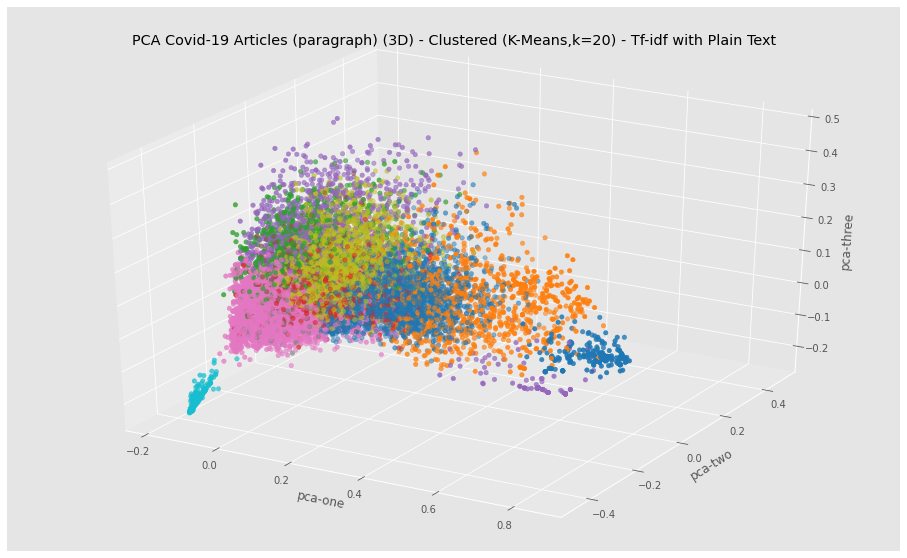

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=pca_result[:,0], 
    ys=pca_result[:,1], 
    zs=pca_result[:,2], 
    c=y, 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.title("PCA Covid-19 Articles (paragraph) (3D) - Clustered (K-Means,k=20) - Tf-idf with Plain Text")
# plt.savefig("plots/pca_covid19_label_TFID_3d.png")
plt.show()

You can see in the graph that there are 6,7 clusters which dominates the other clusters. It means that those paragraph documents are very closely related to each other.

Now we will add those clusters/labels to our dataset to increase our understanding.

In [19]:
para_list['Cluster']=y
para_list.head()

,cord_uid,sha,paper_id,doi,journal,title,authors,abstract,text,url,Cluster
2,wxg6p6r3,cd7c9b90c39c64262d651b6e4f88750afc6db0a8,cd7c9b90c39c64262d651b6e4f88750afc6db0a8,http://doi.org/10.1016/j.amjmed.2020.02.023,The American Journal of Medicine,a cured patient with 2019-ncov pneumonia,"Ding, Defang; Zhu, Caisong; Yao, Weiwu",NaN,on examination she was conscious with a body t...,https://doi.org/10.1016/j.amjmed.2020.02.023,12
6,wxg6p6r3,cd7c9b90c39c64262d651b6e4f88750afc6db0a8,cd7c9b90c39c64262d651b6e4f88750afc6db0a8,http://doi.org/10.1016/j.amjmed.2020.02.023,The American Journal of Medicine,a cured patient with 2019-ncov pneumonia,"Ding, Defang; Zhu, Caisong; Yao, Weiwu",NaN,the patient received moxifloxacin 400 mg once ...,https://doi.org/10.1016/j.amjmed.2020.02.023,4
2,jslfu3qt,5dc4268a42adf3d5c55c87b7f6518de600b057c5,5dc4268a42adf3d5c55c87b7f6518de600b057c5,http://doi.org/10.1016/j.ajog.2020.03.021,American Journal of Obstetrics and Gynecology,coronavirus disease 2019 (covid-19) pandemic a...,"Dashraath, Pradip; Jing Lin Jeslyn, Wong; Mei ...",Abstract The current coronavirus disease 2019 ...,the current coronavirus disease 2019 covid19 p...,https://doi.org/10.1016/j.ajog.2020.03.021,17
6,jslfu3qt,5dc4268a42adf3d5c55c87b7f6518de600b057c5,5dc4268a42adf3d5c55c87b7f6518de600b057c5,http://doi.org/10.1016/j.ajog.2020.03.021,American Journal of Obstetrics and Gynecology,coronavirus disease 2019 (covid-19) pandemic a...,"Dashraath, Pradip; Jing Lin Jeslyn, Wong; Mei ...",Abstract The current coronavirus disease 2019 ...,immune system 233 cytokines produced by thelpe...,https://doi.org/10.1016/j.ajog.2020.03.021,12
10,jslfu3qt,5dc4268a42adf3d5c55c87b7f6518de600b057c5,5dc4268a42adf3d5c55c87b7f6518de600b057c5,http://doi.org/10.1016/j.ajog.2020.03.021,American Journal of Obstetrics and Gynecology,coronavirus disease 2019 (covid-19) pandemic a...,"Dashraath, Pradip; Jing Lin Jeslyn, Wong; Mei ...",Abstract The current coronavirus disease 2019 ...,ensures service continuity social distancing o...,https://doi.org/10.1016/j.ajog.2020.03.021,12


From here, we will start working on our TF-IDF model. Special thanks to William Scott, who did a complete TF-IDF model(https://towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089). It helped us a lot. We changed it with respect to our requirements and did some of changes according to our method.

First of all we will do preprocessing of paragraph document. If you remember we did preprocessing but that was for clustering, it is better if we do more deep preprocessing as now we will be extracting information not just clustering. It is needed that we make each text in specified format and follow certain rules.

In [20]:
import nltk
import os
import string
import numpy as np
import copy
import pandas as pd
import pickle
import re
import math

nltk.download("popular")
!pip install num2words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
from num2words import num2words



def remove_stop_words(data):
    stop_words = stopwords.words('english')
    words = word_tokenize(str(data))
    new_text = ""
    for w in words:
        if w not in stop_words and len(w) > 1:
            new_text = new_text + " " + w
    return new_text

def stemming(data):
    stemmer= PorterStemmer()
    
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        new_text = new_text + " " + stemmer.stem(w)
    return new_text
def convert_numbers(data):
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        try:
            w = num2words(int(w))
        except:
            a = 0
        new_text = new_text + " " + w
    new_text = np.char.replace(new_text, "-", " ")
    return new_text

def convert_lower_case(data):
    return np.char.lower(data)

def remove_punctuation(data):
    symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
    for i in range(len(symbols)):
        data = np.char.replace(data, symbols[i], ' ')
        data = np.char.replace(data, "  ", " ")
    data = np.char.replace(data, ',', '')
    return data

def remove_apostrophe(data):
    return np.char.replace(data, "'", "")


def preprocess(data):
    data = convert_lower_case(data)
    data = remove_punctuation(data) #remove comma seperately
    data = remove_apostrophe(data)
    data = remove_stop_words(data)
    data = convert_numbers(data)
    data = stemming(data)
    data = remove_punctuation(data)
    data = convert_numbers(data)
    data = stemming(data) #needed again as we need to stem the words
    data = remove_punctuation(data) #needed again as num2word is giving few hypens and commas fourty-one
    data = remove_stop_words(data) #needed again as num2word is giving stop words 101 - one hundred and one
    return data

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk

In [21]:
processed_text=[]
i=0
for t in para_list['text']:
    processed_text.append(word_tokenize(str(preprocess(t))))
    if i%1000==0:
        print("text: "+str(i))
    i+=1

print(len(processed_text))

text: 0
text: 1000
text: 2000
text: 3000
text: 4000
text: 5000
text: 6000
text: 7000
text: 8000
text: 9000
text: 10000
text: 11000
text: 12000
text: 13000
13404


Let's define these two terms, so every person can understand what is going on.
* **TF of a document:** It is the term frequency in a document: how many times a word appears in a document.
* **IDF:** It is the inverse document frequency. It is the inverse of In how many documents a word appear. The less the number of document a word appears in, the more score it will have. It basically tells that how much a word uniquely defines a document.

To learn more about approach you can follow William's article. 
Let's find the term frequency.

In [22]:
N=len(processed_text)
DF = {}

for i in range(N):
    tokens = processed_text[i]
    for w in tokens:
        try:
            DF[w].add(i)
        except:
            DF[w] = {i}
for i in DF:
    DF[i] = len(DF[i])

Now we have term frequency of every unique word in our dataset. Let's store the length of unique words which will be our vocabulary size.

In [23]:
total_vocab_size = len(DF)
total_vocab_size

67654

Let's store our vocabulary in a separate place.

In [24]:
total_vocab = [x for x in DF]
total_vocab[:20]

['examin',
 'consciou',
 'bodi',
 'temperatur',
 '383℃',
 'vital',
 'sign',
 'stabl',
 'small',
 'moist',
 'rale',
 'heard',
 'lung',
 'laboratori',
 'test',
 'blood',
 'reveal',
 '449×10',
 'white',
 'cell']

We have defined a function which will give us document frequency. we will use it to calculate document frequency on runtime and take it inverse to find IDF.

In [25]:
def doc_freq(word):
    c = 0
    try:
        c = DF[word]
    except:
        pass
    return c

As we have both TF and IDF calculator, now we will find TF-IDF score.

In [26]:
from collections import Counter
doc = 0

tf_idf = {}

for i in range(N):
    
    tokens = processed_text[i]
    
    counter = Counter(tokens)
    words_count = len(tokens)
    
    for token in np.unique(tokens):
        
        tf = counter[token]/words_count
        df = doc_freq(token)
        idf = np.log((N+1)/(df+1))
        
        tf_idf[doc, token] = tf*idf

    doc += 1
    
len(tf_idf)

1303870

As now we have TF-IDF score of every word in every document, we can calculate TF-IDF score of text in every document by simply adding the TF-IDF score of every word of text in every document. At the end we will sort them by high scores and get the K documents which have top high scores.

In [27]:
def matching_score(k, query):
    tokens = word_tokenize(str(query))

    print("Matching Score")
    print("\nQuery:", query)
    print("")
    print(tokens)
    
    query_weights = {}

    for key in tf_idf:
        
        if key[1] in tokens:
            try:
                query_weights[key[0]] += tf_idf[key]
            except:
                query_weights[key[0]] = tf_idf[key]
    
    query_weights = sorted(query_weights.items(), key=lambda x: x[1], reverse=True)

    print("")
    
    l = []
    
    for i in query_weights[:10]:
        l.append(i[0])
    
    print(l)
    print(para_list.iloc[l[0]])
    

matching_score(10, "pregnant woman")

Matching Score

Query: pregnant woman

['pregnant', 'woman']

[13201, 13203, 13371, 1706, 2262, 4864, 13193, 12093, 1444, 13199]
cord_uid                                             iy9vjpuh
sha                  779c1b5cb3afe3d50219aa2af791014a22eb355a
paper_id             779c1b5cb3afe3d50219aa2af791014a22eb355a
doi                          http://doi.org/10.3390/v12020194
journal                                               Viruses
title       potential maternal and infant outcomes from (w...
authors                 Schwartz, David A.; Graham, Ashley L.
abstract    In early December 2019 a cluster of cases of p...
text        participation of pregnant women in the develop...
url                         https://doi.org/10.3390/v12020194
Cluster                                                    12
Name: 56, dtype: object


This approach of finding query related document is good and simple but this does not work well when query length becomes large i.e 5,15,20 etc words length query. It will not work good in our scanerio because user may give longer query. Thus we will shift to cosine similarity finder.

let's define our cosine similarity score function.

In [28]:
def cosine_sim(a, b):
    cos_sim = np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))
    return cos_sim

In [29]:
len(tf_idf)

1303870

let's do some preprocessing. We have defined a vector generator function which will create vector in space of given text.

In [30]:
D = np.zeros((N, total_vocab_size))
cnt=0
for i in tf_idf:
    if cnt%100000==0:
        print(cnt)
    try:
        ind = total_vocab.index(i[1])
        D[i[0]][ind] = tf_idf[i]
    except:
        pass
    cnt+=1

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000


In [31]:
def gen_vector(tokens):

    Q = np.zeros((len(total_vocab)))
    
    counter = Counter(tokens)
    words_count = len(tokens)

    query_weights = {}
    
    for token in np.unique(tokens):
        
        tf = counter[token]/words_count
        df = doc_freq(token)
        idf = math.log((N+1)/(df+1))

        try:
            ind = total_vocab.index(token)
            Q[ind] = tf*idf
        except:
            pass
    return Q

Now we have every modular function to help, at first we will give query, query will be preprocessed in the same way every document is preprocessed so we can have better results. Then it will generate vector of query in space and check the similarity of query vector with every paragraph document vector by measuring distance between them and get the top k paragraph document which has high similarity scores.

After getting the paragraph document it will merge those paragraph which points to same document and show the results including documents informations i.e title,abstract,paper_id,text,sha,url/doi etc. It shows the specific paragraph of a document which is related to your query, you can also view the whole document by following url/doi given in the result.

Moreover, 'Cluster' field also added to results/Output, so you can see that in which cluster these documents falls in. you can also find dominating cluster in these results and search for documents of dominating cluster and read it.

In [32]:
def cosine_similarity(k, query):
    # print("Cosine Similarity")
    preprocessed_query = preprocess(query)
    tokens = word_tokenize(str(preprocessed_query))
    
    # print("\nQuery:", query)
    # print("")
    # print(tokens)
    
    d_cosines = []
    
    query_vector = gen_vector(tokens)
    
    for d in D:
        d_cosines.append(cosine_sim(query_vector, d))
        
    out = np.array(d_cosines).argsort()[-k:][::-1]
    
    result=pd.DataFrame(columns=['cord_uid','sha','paper_id','doi','journal','title','authors','abstract','text','url'])
    for file in out:
      found=result[result['paper_id'].str.contains(str(para_list.iloc[file]['paper_id']),na=False)]
      if len(found)!=0:
        indx=result.index[result['paper_id'] == para_list.iloc[file]['paper_id']]
        result.loc[indx]['text']=result.loc[indx]['text'] +"***************************************************"+ para_list.iloc[file]['text']
      else:
        result=result.append(para_list.iloc[file])
    return result

These were the question from the tasks. You can see their result.

In [33]:
pd.options.display.max_colwidth=70
questions=['Smoking, pre-existing pulmonary disease',
          'Co-infections (determine whether co-existing respiratory/viral infections make the virus more transmissible or virulent) and other co-morbidities',
          'Neonates and pregnant women',
          'Socio-economic and behavioral factors to understand the economic impact of the virus and whether there were differences',
          'Transmission dynamics of the virus, including the basic reproductive number, incubation period, serial interval, modes of transmission and environmental factors',
          'Severity of disease, including risk of fatality among symptomatic hospitalized patients, and high-risk patient groups',
          'Susceptibility of populations',
          'Public health mitigation measures that could be effective for control']
Q = cosine_similarity(10, questions[0])
Q2 = cosine_similarity(10, questions[1])
Q3 = cosine_similarity(10, questions[2])
Q4 = cosine_similarity(10, questions[3])
Q5 = cosine_similarity(10, questions[4])
Q6 = cosine_similarity(10, questions[5])
Q7 = cosine_similarity(10, questions[6])
Q8 = cosine_similarity(10, questions[7])
Q.to_csv('./smokingPreExistingPulmonaryDisease.csv', index=False)
Q2.to_csv('./coinfectionsComorbities.csv', index=False)
Q3.to_csv('./neonatesPregnantWomen.csv', index=False)
Q4.to_csv('./socioeconomicBehavioralFactors.csv', index=False)
Q5.to_csv('./transmissionDynamicsVirus.csv', index=False)
Q6.to_csv('./severityDiseaseIncludingRisk.csv', index=False)
Q7.to_csv('./susceptibilityOfPopulations.csv', index=False)
Q8.to_csv('./publicHealthMitigationMeasures.csv', index=False)
Q8['title']

14    window of opportunity for mitigation to prevent overflow of icu ca...
4     mitigate the effects of home confinement on children during the co...
0     how will country-based mitigation measures influence the course of...
46    which measures are effective in containing covid-19? empirical res...
8     can we contain the covid-19 outbreak with the same measures as for...
18    modelling the coronavirus disease (covid-19) outbreak on the diamo...
26    suppression and mitigation strategies for control of covid-19 in n...
26    machine learning the phenomenology of covid-19 from early infectio...
14    epidemiological research priorities for public health control of t...
Name: title, dtype: object

Let's see the whole result.

In [34]:
Q.head()

,cord_uid,sha,paper_id,doi,journal,title,authors,abstract,text,url,Cluster
58,plfjkp5f,461a32146936c2db3491cfe5fe95fbabae4a3d27,461a32146936c2db3491cfe5fe95fbabae4a3d27,http://doi.org/10.1101/2020.03.25.20043745,NaN,"prevalence, severity and mortality associated with copd and smokin...",Jaber S Alqahtani; Tope Oyelade; Abdulelah M Aldhahir; Saeed M Alg...,Background: Coronavirus disease 2019 (COVID-19) is an evolving inf...,unknown and undoubtedly more research is needed to find the possib...,https://doi.org/10.1101/2020.03.25.20043745,17.0
10,q5x3bask,602bd8abdd8f0d464941d989322e843533cea15d,602bd8abdd8f0d464941d989322e843533cea15d,http://doi.org/10.1101/2020.03.28.013672,NaN,cigarette smoke triggers the expansion of a subpopulation of respi...,Joan C Smith; Jason Meyer Sheltzer,"The coronavirus SARS-CoV-2 has infected more than 600,000 people a...",cigarette smoking is strongly associated with adverse outcomes fro...,https://doi.org/10.1101/2020.03.28.013672,6.0
2,ozcmbug4,16bfa83d011a2f290843d20f6850d8ea08a853ae,NaN,http://doi.org/10.1016/j.ejim.2020.03.014,European Journal of Internal Medicine,active smoking is not associated with severity of coronavirus dise...,"Lippi, Giuseppe; Henry, Brandon Michael",NaN,in the ongoing coronavirus disease 2019 covid19 pandemic some uniq...,https://doi.org/10.1016/j.ejim.2020.03.014,9.0
16,eymqlbix,93bfa987b95841fe44e740879ab622162c78a4b4,93bfa987b95841fe44e740879ab622162c78a4b4,http://doi.org/10.1016/j.jcct.2020.03.002,Journal of Cardiovascular Computed Tomography,society of cardiovascular computed tomography guidance for use of ...,"Choi, Andrew D.; Abbara, Suhny; Branch, Kelley R.; Feuchtner, Gudr...",Abstract The world is currently suffering through a pandemic outbr...,incidental pulmonary findings in patients at risk of covid19 exposure,https://doi.org/10.1016/j.jcct.2020.03.002,9.0
10,66lwpblq,8f08623227f8d882c2b3271c07efde539ac6b12e,8f08623227f8d882c2b3271c07efde539ac6b12e,http://doi.org/10.1053/j.jvca.2020.03.035,Journal of Cardiothoracic and Vascular Anesthesia,anesthesia management and perioperative infection control in patie...,"Li, Weixia; Huang, Jiapeng; Guo, Xiangyang; Zhao, Jing; Mandell, M...",NaN,pre and postoperative areas and the operating room are busy care s...,https://doi.org/10.1053/j.jvca.2020.03.035,17.0


As, in above result(in my case) dominating clusters are 18 and 9. So you can check both clusters documents as well.

In [35]:
(para_list.loc[para_list['Cluster'] == 18]).head()

,cord_uid,sha,paper_id,doi,journal,title,authors,abstract,text,url,Cluster
2,2ydv61uq,cfdbab6c00426bb64b8da525fa631735dec70108,NaN,http://doi.org/10.1016/j.amp.2020.03.001,"Annales Médico-psychologiques, revue psychiatrique",aspects médico-psychologiques relatifs à l’épidémie de coronavirus...,"Naviaux, Anne-Frédérique; Janne, Pascal; Gourdin, Maximilien",NaN,le nouveau coronavirus 2 4 5 7 12 13 14 15 suscite bien des interr...,https://doi.org/10.1016/j.amp.2020.03.001,18
6,2ydv61uq,cfdbab6c00426bb64b8da525fa631735dec70108,NaN,http://doi.org/10.1016/j.amp.2020.03.001,"Annales Médico-psychologiques, revue psychiatrique",aspects médico-psychologiques relatifs à l’épidémie de coronavirus...,"Naviaux, Anne-Frédérique; Janne, Pascal; Gourdin, Maximilien",NaN,en 1966 julian rotter sur la base de la constatation ré currente d...,https://doi.org/10.1016/j.amp.2020.03.001,18
10,2ydv61uq,cfdbab6c00426bb64b8da525fa631735dec70108,NaN,http://doi.org/10.1016/j.amp.2020.03.001,"Annales Médico-psychologiques, revue psychiatrique",aspects médico-psychologiques relatifs à l’épidémie de coronavirus...,"Naviaux, Anne-Frédérique; Janne, Pascal; Gourdin, Maximilien",NaN,ces liens bien que nayant pas encore é té dé montré s au vu de la ...,https://doi.org/10.1016/j.amp.2020.03.001,18
14,2ydv61uq,cfdbab6c00426bb64b8da525fa631735dec70108,NaN,http://doi.org/10.1016/j.amp.2020.03.001,"Annales Médico-psychologiques, revue psychiatrique",aspects médico-psychologiques relatifs à l’épidémie de coronavirus...,"Naviaux, Anne-Frédérique; Janne, Pascal; Gourdin, Maximilien",NaN,en ce qui concerne le coronavirus tant les institutions de soins q...,https://doi.org/10.1016/j.amp.2020.03.001,18
2,uyk160ay,a566d9ee05bcb833ceedad0c61c55eadf5f2e7be,NaN,http://doi.org/10.1016/j.bulcan.2020.03.008,Bulletin du Cancer,covid-19 et personnes suivies pour un cancer du sein : recommandat...,"Gligorov, Joseph; Bachelot, Thomas; Pierga, Jean-Yves; Antoine, Er...",NaN,nous sommes confrontés à la pandémie covid19 qui certes est sans c...,https://doi.org/10.1016/j.bulcan.2020.03.008,18
